In [1]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
#from dataset.mnist import load_mnist
from dataset.fashion_mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


In [2]:
# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


In [3]:
# 1:実験の設定==========
optimizers = {}
#optimizers['SGD'] = SGD()
#optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
optimizers['RMSprop'] = RMSprop()
optimizers['SDprop'] = SDprop(bias_correction=True)
optimizers['Adastand'] = Adastand()

In [4]:
networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


In [5]:
# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


===========iteration:0===========
Adam:2.2324556501241193
AdaGrad:2.046765319451865
SDprop:1.996430093063313
RMSprop:2.9291625415806175
Adastand:2.116523972960398
===========iteration:100===========
Adam:0.6092903407262562
AdaGrad:0.5788694538111353
SDprop:0.5376015829227918
RMSprop:0.5552923050258541
Adastand:0.593042079541304
===========iteration:200===========
Adam:0.44608668228678583
AdaGrad:0.3992808185605884
SDprop:0.4041886621561969
RMSprop:0.39070372122206826
Adastand:0.4046620429368667
===========iteration:300===========
Adam:0.3514055516854141
AdaGrad:0.2974604261201529
SDprop:0.28026340229451296
RMSprop:0.3163220550061318
Adastand:0.2985018209383311
===========iteration:400===========
Adam:0.35532513194906673
AdaGrad:0.3637816594922784
SDprop:0.3139615464991622
RMSprop:0.293569520029302
Adastand:0.36987339647494255
===========iteration:500===========
Adam:0.4380524650332066
AdaGrad:0.39957870178373706
SDprop:0.32621415431393075
RMSprop:0.3196381973567124
Adastand:0.415151137

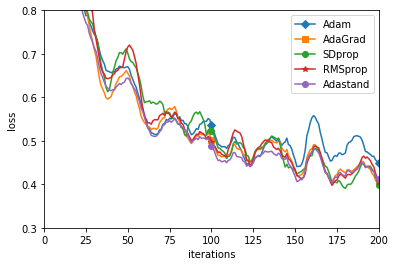

In [6]:
# 3.グラフの描画==========
#markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
markers = {"AdaGrad": "s", "Adam": "D", "RMSprop": "*", "SDprop": "o", "Adastand": "o" }
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0.3, 0.8)
plt.xlim(0,200)
plt.legend()
plt.show()